# Handwritten digits classification using a Neural Network
<br>
<img src="https://miro.medium.com/max/800/1*LyRlX__08q40UJohhJG9Ow.png" align="left" width="50%">

## Libraries and settings

In [1]:
# Required libraries:
# !pip install tensorflow

import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Current working directory
print('Current working directory:', os.getcwd())

2022-12-09 00:28:36.854220: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Current working directory: /Users/raphi/Desktop/Materials for exercises-20221208


## Prepare the data (MNIST dataset)
For details of the data see: https://en.wikipedia.org/wiki/MNIST_database

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# The data, split between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 1s 0us/step
60000 train samples
10000 test samples


## Show single handwritten digit

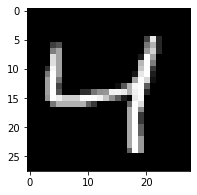

In [3]:
image = X_train[2] # Change index to show other digits
fig = plt.figure
plt.figure(figsize=(3,3))
plt.imshow(image, cmap='gray')
plt.show()

In [4]:
# Shape of a single image
X_train[2].shape

(28, 28, 1)

## Initialize the model

In [5]:
# Initialize the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
# model.summary()

## Train the model

In [6]:
# Define the batch size and number of epochs
# Note:
# The batch size is a number of samples processed 
# before the model is updated. The number of epochs 
# is the number of complete passes through the training 
# dataset. The size of a batch must be more than or equal 
# to one and less than or equal to the number of samples 
# in the training dataset.

batch_size = 128
epochs = 5

# Train the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 11s 25ms/step - loss: 0.3706 - accuracy: 0.8867 - val_loss: 0.0865 - val_accuracy: 0.9762
Epoch 2/5
422/422 [==============================] - 10s 24ms/step - loss: 0.1111 - accuracy: 0.9662 - val_loss: 0.0554 - val_accuracy: 0.9843
Epoch 3/5
422/422 [==============================] - 11s 25ms/step - loss: 0.0844 - accuracy: 0.9741 - val_loss: 0.0462 - val_accuracy: 0.9870
Epoch 4/5
422/422 [==============================] - 11s 25ms/step - loss: 0.0704 - accuracy: 0.9786 - val_loss: 0.0475 - val_accuracy: 0.9860
Epoch 5/5
422/422 [==============================] - 12s 30ms/step - loss: 0.0623 - accuracy: 0.9812 - val_loss: 0.0371 - val_accuracy: 0.9893


## Evaluate the trained model

In [7]:
# Calculate accuracy based on the test data
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {score[1]:.4f}')

Test accuracy: 0.9886


### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [8]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Darwin | 22.1.0
Datetime: 2022-12-09 00:30:05
Python Version: 3.9.12
-----------------------------------
